# Experimento 3 - Órdenes Correlativas

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import sys

sys.path.append("../..")

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Use latex
plt.rc("text", usetex=True)

## Definición

In [3]:
from experimento import Experimento
from src.generacion import (
    GeneradorInstancias,
    DistribucionIndependiente,
    DistribucionUniforme,
    DistribucionNormal,
)


experimento = Experimento(
    nombre="exp3",
    generador=GeneradorInstancias(
        cantidad_trabajadores=DistribucionUniforme(5, 10),
        cantidad_ordenes=DistribucionUniforme(5, 20),
        parametros_ordenes=DistribucionIndependiente(
            DistribucionNormal(10000, 2000),
            DistribucionUniforme(3, 10),
        ),
        cantidad_ordenes_correlativas=DistribucionUniforme(2, 10),
    ),
    N=1000,
    seed=42,
)

## Ejecución

In [4]:
resultados = experimento.ejecutar()

## Análisis

In [5]:
from graficos import histograma, histograma_discreto, histograma_hue

### Distribución Función Objetivo

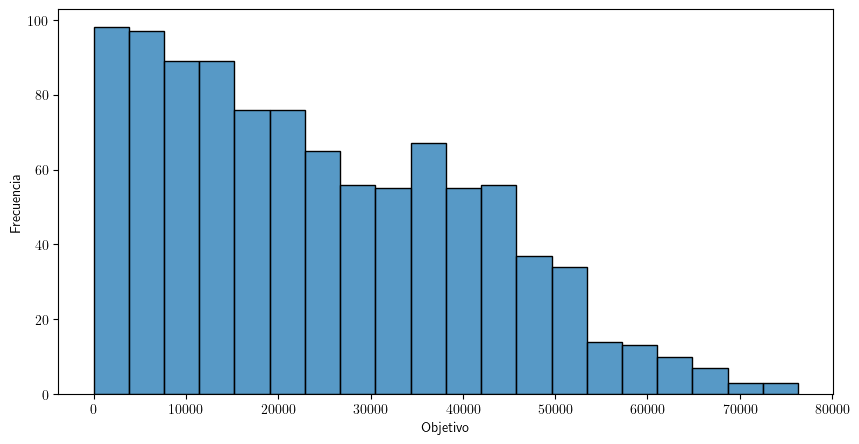

In [6]:
fig = histograma(resultados.objetivos, xlabel="Objetivo")

experimento.guardar_imagen(fig, "distribucion_objetivo")

In [7]:
pd.Series(resultados.objetivos).describe()

count     1000.000000
mean     24272.238838
std      16967.447557
min          0.000000
25%      10278.537670
50%      21617.740674
75%      36804.636129
max      76315.554905
dtype: float64

In [8]:
(pd.Series(resultados.objetivos) <= 1e-8).mean()

np.float64(0.065)

#### Proporción Óptimo

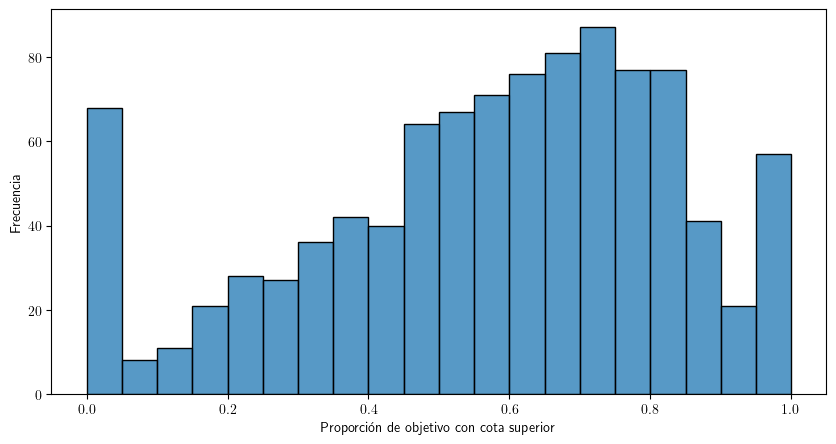

In [9]:
fig = histograma(
    [
        obj / instancia.bmp_realizables()
        for obj, instancia in zip(resultados.objetivos, resultados.instancias)
        if instancia.bmp_realizables() > 0
    ],
    xlabel="Proporción de objetivo con cota superior",
)

experimento.guardar_imagen(fig, "distribucion_objetivo_proporcion")

### Ciclos de Correlatividades

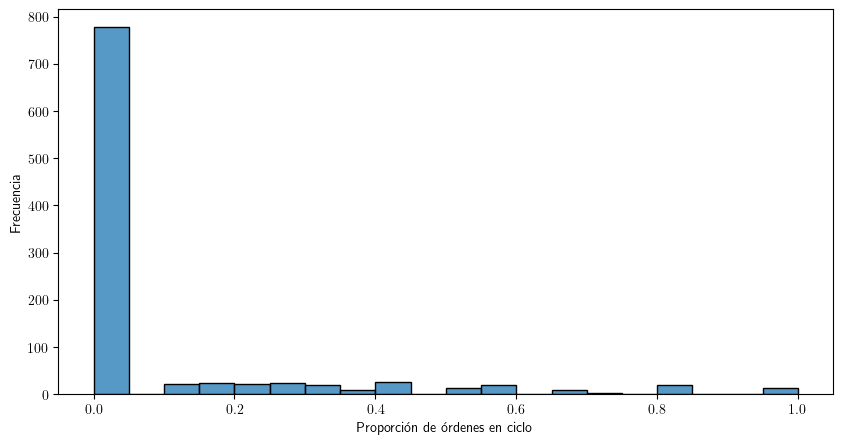

In [12]:
proporcion_ordenes_en_ciclo = [
    len(instancia.ordenes_en_ciclo_correlatividades()) / len(instancia.ordenes)
    for instancia in resultados.instancias
]

fig = histograma(proporcion_ordenes_en_ciclo, xlabel="Proporción de órdenes en ciclo")

experimento.guardar_imagen(fig, "distribucion_proporcion_ordenes_ciclo")

In [13]:
pd.Series(proporcion_ordenes_en_ciclo).describe()

count    1000.000000
mean        0.093619
std         0.211404
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
dtype: float64

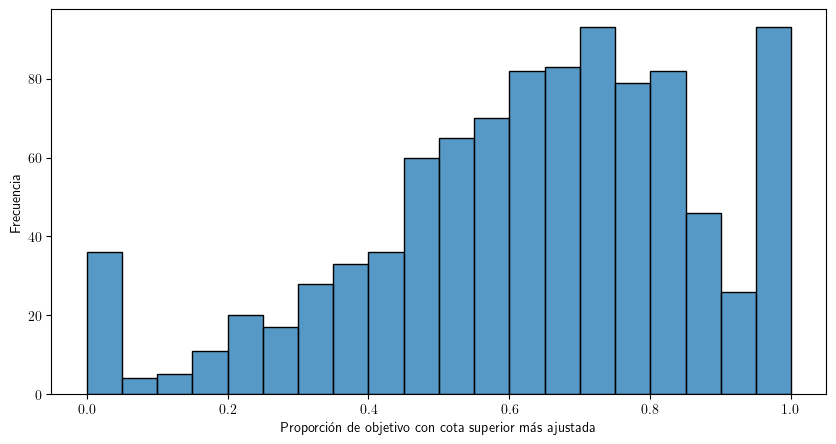

In [14]:
proporciones_optimo_mas_ajustado = [
    obj / instancia.bmp_realizables_sin_ciclo_correlatividades()
    for obj, instancia in zip(resultados.objetivos, resultados.instancias)
    if instancia.bmp_realizables_sin_ciclo_correlatividades() > 0
]

fig = histograma(
    proporciones_optimo_mas_ajustado,
    xlabel="Proporción de objetivo con cota superior más ajustada",
)

experimento.guardar_imagen(fig, "distribucion_proporcion_objetivo_sin_ciclos")